In [1]:
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from sklearn.decomposition import PCA
from itertools import combinations
from scipy.spatial.distance import euclidean

In [2]:
from nltk.corpus import wordnet, brown
# Download the WordNet data if not already available
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('brown')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
brown_word_freq = Counter(brown.words())

# Load dataset

In [4]:
df_rel = pd.read_csv('nlp-fairness-for-india-main/religion_annotations.tsv',sep='\t')
df_rel['axis'] = 'religion'
df_rel.head()

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis
0,buddhist,vegan,4,2,0,6,religion
1,buddhist,art,2,1,3,6,religion
2,buddhist,caring,2,1,3,6,religion
3,buddhist,calm,3,0,3,6,religion
4,buddhist,kind,3,0,3,6,religion


In [5]:
df_rel.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   identity_term      1296 non-null   object
 1   token              1296 non-null   object
 2   Stereotypical      1296 non-null   int64 
 3   Non_Stereotypical  1296 non-null   int64 
 4   Not sure           1296 non-null   int64 
 5   Total              1296 non-null   int64 
 6   axis               1296 non-null   object
dtypes: int64(4), object(3)
memory usage: 71.0+ KB


In [6]:
df_rel['identity_term'].value_counts(dropna=False)

identity_term
buddhist     216
christian    216
hindu        216
jain         216
muslim       216
sikh         216
Name: count, dtype: int64

In [7]:
df_reg = pd.read_csv('nlp-fairness-for-india-main/region_annotations.tsv',sep='\t')
df_reg['axis'] = 'region'
df_reg.head()

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis
0,arunachali,athlete,1,2,0,3,region
1,arunachali,boxer,0,2,1,3,region
2,arunachali,business,0,2,1,3,region
3,arunachali,calm,1,2,0,3,region
4,arunachali,ceo,0,0,3,3,region


In [8]:
df_reg.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   identity_term      2556 non-null   object
 1   token              2556 non-null   object
 2   Stereotypical      2556 non-null   int64 
 3   Non_Stereotypical  2556 non-null   int64 
 4   Not sure           2556 non-null   int64 
 5   Total              2556 non-null   int64 
 6   axis               2556 non-null   object
dtypes: int64(4), object(3)
memory usage: 139.9+ KB


In [9]:
df_reg['identity_term'].value_counts(dropna=False)

identity_term
assamese           139
bengali            139
uttar pradeshi     139
rajasthani         139
gujarati           139
punjabi            139
uttarakhandi       138
tamilian           138
odiya              135
marathi            133
madhya pradeshi    133
jharkhandi         128
kashmiri           126
bihari             113
goan                95
chattisgarhi        94
kannadiga           81
manipuri            79
arunachali          77
meghalayan          76
haryanvi            76
telugu              39
tripuri             35
himachali           23
mizo                 3
Name: count, dtype: int64

In [10]:
df = pd.concat([df_rel, df_reg], axis=0, ignore_index=True).reset_index(drop=True)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3852 entries, 0 to 3851
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   identity_term      3852 non-null   object
 1   token              3852 non-null   object
 2   Stereotypical      3852 non-null   int64 
 3   Non_Stereotypical  3852 non-null   int64 
 4   Not sure           3852 non-null   int64 
 5   Total              3852 non-null   int64 
 6   axis               3852 non-null   object
dtypes: int64(4), object(3)
memory usage: 210.8+ KB


In [11]:
#Stereotype Confidence: Pct of annotators that marked the tuple as a stereotype
df['stereo_rate']= df['Stereotypical']/df['Total'] * 100

In [12]:
df.sort_values(by='stereo_rate', ascending=False).head(20)

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis,stereo_rate
500,hindu,pandit,6,0,0,6,religion,100.000000
243,christian,nonvegetarian,6,0,0,6,religion,100.000000
3432,tamilian,mathematician,6,0,0,6,region,100.000000
230,christian,opera singer,5,1,0,6,religion,83.333333
492,hindu,priest,5,1,0,6,religion,83.333333
1603,bengali,poet,5,1,0,6,region,83.333333
659,jain,vegetarian,5,1,0,6,religion,83.333333
658,jain,vegan,5,1,0,6,religion,83.333333
8,buddhist,vegetarian,5,1,0,6,religion,83.333333
232,christian,priest,5,1,0,6,religion,83.333333


In [13]:
#flag for stereotype where confidence is high (according to the annotators)
df['stereotype_flag'] = df['stereo_rate'].map(lambda x :1 if x>=50 else 0)

df_top= df[df['stereo_rate']>=50].sort_values(by='stereo_rate', ascending=False).reset_index(drop=True)
df_top

In [14]:
df['token']= df['token'].map(lambda x : x.replace(' ','_')) #word2vec stores multi-words with underscores

In [15]:
len(df)

3852

# Load pretrained word2vec model

Downloaded word2vec pretrained model from https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300?select=GoogleNews-vectors-negative300.bin.gz

In [16]:
model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format('w2v/GoogleNews-vectors-negative300.bin', binary=True) 

https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/

In [17]:
model['computer'].shape

(300,)

In [18]:
model['computer']

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [19]:
#cosine similarity
model.most_similar('doctor')

[('physician', 0.7806021571159363),
 ('doctors', 0.747657299041748),
 ('gynecologist', 0.6947518587112427),
 ('surgeon', 0.6793398261070251),
 ('dentist', 0.6785441040992737),
 ('pediatrician', 0.664313793182373),
 ('pharmacist', 0.653485894203186),
 ('neurologist', 0.6517742872238159),
 ('cardiologist', 0.6352297067642212),
 ('nurse', 0.6319523453712463)]

In [20]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [21]:
model.most_similar(positive=['queen'])

[('queens', 0.739944338798523),
 ('princess', 0.7070532441139221),
 ('king', 0.6510956883430481),
 ('monarch', 0.6383602023124695),
 ('very_pampered_McElhatton', 0.6357026696205139),
 ('Queen', 0.6163407564163208),
 ('NYC_anglophiles_aflutter', 0.6060680150985718),
 ('Queen_Consort', 0.5923796892166138),
 ('princesses', 0.5908074975013733),
 ('royal', 0.5637185573577881)]

In [22]:
model.similarity('queen', 'king')

0.6510957

# Check if the Identitiy terms and tokens are present in the w2v model

Some of the region terms and tokens are not present, since this model is not trained on a large corpus Indian news specifically.
It would be a good idea to further train the embeddings on indicCorp-en. For this exercise, let's stick to the regions and tokens already present, and check for synonyms that may be present.

In [23]:
rel_terms=set([])
for w in df_rel['identity_term'].unique():
    print(w, w in model)
    if w in model:
        rel_terms.add(w)

buddhist True
christian True
hindu True
jain True
muslim True
sikh True


In [24]:
reg_terms=set([])
for w in df_reg['identity_term'].unique():
    print(w, w in model)
    if w in model:
        reg_terms.add(w)


arunachali False
assamese False
bengali True
bihari True
chattisgarhi False
goan True
gujarati False
haryanvi False
himachali False
jharkhandi False
kannadiga False
kashmiri True
madhya pradeshi False
manipuri False
marathi True
meghalayan False
mizo False
odiya False
punjabi True
rajasthani False
tamilian False
telugu True
tripuri False
uttar pradeshi False
uttarakhandi False


In [25]:
id_terms=set([])
for w in df['identity_term'].unique():
    print(w, w in model)
    if w in model:
        id_terms.add(w)


buddhist True
christian True
hindu True
jain True
muslim True
sikh True
arunachali False
assamese False
bengali True
bihari True
chattisgarhi False
goan True
gujarati False
haryanvi False
himachali False
jharkhandi False
kannadiga False
kashmiri True
madhya pradeshi False
manipuri False
marathi True
meghalayan False
mizo False
odiya False
punjabi True
rajasthani False
tamilian False
telugu True
tripuri False
uttar pradeshi False
uttarakhandi False


In [26]:
token_terms=set([])
for w in df['token'].unique():
    if w not in model:
        print(w)
    else:
        token_terms.add(w)
        


factory_worker
middle_class
performing_artist
software_developer
beaurocrat
chess_player
computer_science
construction_worker
delivery_man
driverchauffeur
film_maker
fire_fighter
football_player
handball_player
home_maker
labourer
land_owner
lifegaurd
phamacist
realestate_developer
security_gaurd
tennis_player
travelling
colourful


In [27]:
#df = df[df['identity_term'].isin(id_terms)].reset_index(drop=True)
#df = df[df['token'].isin(token_terms)].reset_index(drop=True)

# Get synonyms of Tokens and Identity terms not present in w2v

In [28]:
# func code generated with ChatGPT. Prompt: Can you generate python code to list synonyms of a word.
# Modified it to only return synonyms present in the word2vec model
def get_synonyms(word, model, word_freq, return_lst=False):
    if not return_lst:
        
        if word in model:
            return word
        
        synonyms = []
        
    else:
        if word in model:
            synonyms = [word]
        else:
            synonyms = []
        
    
    
    # Look up word in WordNet and extract synonyms from synsets
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace('_', ' ')
            # Append the lemma name if it's not already in the list
            if synonym not in synonyms:
                if synonym in model: #only include synonyms present in w2v
                        synonyms.append(synonym)
                        
    if return_lst:
        return synonyms
    
    #else, return top synonym
    if len(synonyms) == 0 :
        return None
    
    #return the synonym with the most word frequency          
    synonyms = sorted(synonyms, key=lambda s: word_freq[s.lower()], reverse=True)  
        
    return synonyms[0]

# Example usage
word = "labourer"
synonyms = get_synonyms(word, model, brown_word_freq)
print(f"Synonyms for '{word}': {synonyms}")


Synonyms for 'labourer': laborer


In [29]:
get_synonyms(word, model, brown_word_freq, return_lst =True)

['laborer', 'jack']

In [30]:
# func code generated with ChatGPT. Prompt: Can you generate python code to list antonyms of a word.
# Modified it to only return synonyms present in the word2vec model
def get_antonyms(word, model, word_freq):


    antonyms = set()
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            if lemma.antonyms():  # Check if antonyms exist
                ant=lemma.antonyms()[0].name()
                #if ant in model:
                antonyms.add(ant)
    return list(antonyms)





In [31]:
get_antonyms('happy', model, brown_word_freq)

['unhappy']

In [32]:
len(df)

3852

In [33]:
df['id_synonyms'] = df['identity_term'].map(lambda x : get_synonyms(x,model, brown_word_freq))
df['tkn_synonyms'] = df['token'].map(lambda x : get_synonyms(x, model, brown_word_freq))

In [34]:
df[df['token'] != df['tkn_synonyms']].dropna()

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis,stereo_rate,stereotype_flag,id_synonyms,tkn_synonyms
36,buddhist,middle_class,1,2,0,3,religion,33.333333,0,buddhist,bourgeoisie
38,buddhist,performing_artist,1,2,0,3,religion,33.333333,0,buddhist,performer
91,buddhist,computer_science,0,3,0,3,religion,0.000000,0,buddhist,computing
116,buddhist,film_maker,0,3,0,3,religion,0.000000,0,buddhist,filmmaker
118,buddhist,fire_fighter,0,3,0,3,religion,0.000000,0,buddhist,fireman
...,...,...,...,...,...,...,...,...,...,...,...
2480,kashmiri,labourer,0,3,0,3,region,0.000000,0,kashmiri,laborer
2785,marathi,labourer,0,3,0,3,region,0.000000,0,marathi,laborer
2798,marathi,colourful,0,2,1,3,region,0.000000,0,marathi,colorful
3136,punjabi,labourer,0,3,0,3,region,0.000000,0,punjabi,laborer


In [35]:
df[df['id_synonyms'].isna()]['identity_term'].unique()

array(['arunachali', 'chattisgarhi', 'haryanvi', 'himachali',
       'jharkhandi', 'kannadiga', 'madhya pradeshi', 'manipuri',
       'meghalayan', 'mizo', 'odiya', 'rajasthani', 'tamilian', 'tripuri',
       'uttar pradeshi', 'uttarakhandi'], dtype=object)

In [36]:
df[df['tkn_synonyms'].isna()]['token'].unique()

array(['factory_worker', 'software_developer', 'beaurocrat',
       'chess_player', 'construction_worker', 'delivery_man',
       'driverchauffeur', 'handball_player', 'home_maker', 'land_owner',
       'lifegaurd', 'phamacist', 'realestate_developer', 'security_gaurd',
       'tennis_player'], dtype=object)

There are some spelling mistakes in the dataset

In [37]:
df['token']=df['token'].replace({'driverchauffeur':'driver','lifegaurd':'lifeguard','phamacist':'pharmacist','realestate_developer':'real_estate_developer','security_gaurd':'security_guard','beaurocrat':'bureaucrat'})

In [38]:
#common synonyms 
df['token']=df['token'].replace({'home_maker':'housewife', 'factory_worker':'laborer','construction_worker':'laborer'})

In [39]:
df['tkn_synonyms'] = df['token'].map(lambda x : get_synonyms(x, model, brown_word_freq))

In [40]:
df[df['tkn_synonyms'].isna()]['token'].unique()

array(['software_developer', 'chess_player', 'delivery_man',
       'handball_player', 'land_owner', 'real_estate_developer',
       'tennis_player'], dtype=object)

In [41]:
for w in df[df['tkn_synonyms'].isna()]['token'].unique(): #proxies: by omiting the last phrase, may not be the best way
    if '_' in w:
        df['token']=df['token'].replace({w:w[:w.rfind('_')]})

In [42]:
df[df['tkn_synonyms'].isna()]['token'].unique()

array(['software', 'chess', 'delivery', 'handball', 'land', 'real_estate',
       'tennis'], dtype=object)

In [43]:
df['tkn_synonyms'] = df['token'].map(lambda x : get_synonyms(x, model, brown_word_freq))

In [44]:
df[df['tkn_synonyms'].isna()]['token'].unique()

array([], dtype=object)

In [45]:
#############

In [46]:
df = df.dropna(subset=['tkn_synonyms','id_synonyms'], axis=0).reset_index(drop=True) #null if the token/ID term is not present in w2v, and neither are any synonyms

In [47]:
len(df)

2358

In [48]:
df['identity_term'] = df['id_synonyms']
df['token'] = df['tkn_synonyms']

In [49]:
df

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis,stereo_rate,stereotype_flag,id_synonyms,tkn_synonyms
0,buddhist,vegan,4,2,0,6,religion,66.666667,1,buddhist,vegan
1,buddhist,art,2,1,3,6,religion,33.333333,0,buddhist,art
2,buddhist,caring,2,1,3,6,religion,33.333333,0,buddhist,caring
3,buddhist,calm,3,0,3,6,religion,50.000000,1,buddhist,calm
4,buddhist,kind,3,0,3,6,religion,50.000000,1,buddhist,kind
...,...,...,...,...,...,...,...,...,...,...,...
2353,telugu,science,1,2,0,3,region,33.333333,0,telugu,science
2354,telugu,successful,1,2,0,3,region,33.333333,0,telugu,successful
2355,telugu,technology,2,0,4,6,region,33.333333,0,telugu,technology
2356,telugu,teacher,0,3,0,3,region,0.000000,0,telugu,teacher


# Cosine similarity of the pairs

Cosine similarity is based on the angular distance between 2 vectors. Values close to 1 indicate similarity (according to the pretrained model)

In [50]:
df['cosine_similarity'] = None
for i in df.index:
    df.at[i,'cosine_similarity'] = model.similarity(df.at[i,'identity_term'], df.at[i,'token'])


In [51]:
df['cosine_similarity_abs'] = np.abs(df['cosine_similarity'])

The absolute value of cosine similarity is low, but this may be due to the fact that the pretrained word2vec has not been trained on enough Indian news text. Let's look at th values in a more relative sense

In [52]:
df.sort_values(by='cosine_similarity', ascending=False)

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis,stereo_rate,stereotype_flag,id_synonyms,tkn_synonyms,cosine_similarity,cosine_similarity_abs
1846,Gujarati,pandit,1,1,1,3,region,33.333333,0,Gujarati,pandit,0.574945,0.574945
1615,bihari,pandit,1,2,0,3,region,33.333333,0,bihari,pandit,0.570708,0.570708
1479,bengali,pandit,1,1,1,3,region,33.333333,0,bengali,pandit,0.56084,0.56084
656,jain,pandit,4,2,0,6,religion,66.666667,1,jain,pandit,0.557714,0.557714
860,jain,washerman,0,3,0,3,religion,0.000000,0,jain,washerman,0.556747,0.556747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,muslim,consultant,0,3,0,3,religion,0.000000,0,muslim,consultant,-0.115122,0.115122
922,muslim,director,1,2,0,3,religion,33.333333,0,muslim,director,-0.117846,0.117846
460,hindu,director,2,4,0,6,religion,33.333333,0,hindu,director,-0.121495,0.121495
559,hindu,manager,1,2,0,3,religion,33.333333,0,hindu,manager,-0.126834,0.126834


In [53]:
df[(df['stereotype_flag']==1) ].sort_values(by='cosine_similarity', ascending=False).head(25)

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis,stereo_rate,stereotype_flag,id_synonyms,tkn_synonyms,cosine_similarity,cosine_similarity_abs
656,jain,pandit,4,2,0,6,religion,66.666667,1,jain,pandit,0.557714,0.557714
500,hindu,pandit,6,0,0,6,religion,100.000000,1,hindu,pandit,0.44516,0.44516
1058,muslim,terrorist,3,1,2,6,religion,50.000000,1,muslim,terrorist,0.373378,0.373378
1526,bengali,poet,5,1,0,6,region,83.333333,1,bengali,poet,0.31178,0.31178
1656,bihari,laborer,4,2,0,6,region,66.666667,1,bihari,laborer,0.306873,0.306873
232,christian,priest,5,1,0,6,religion,83.333333,1,christian,priest,0.306774,0.306774
8,buddhist,vegetarian,5,1,0,6,religion,83.333333,1,buddhist,vegetarian,0.287082,0.287082
659,jain,vegetarian,5,1,0,6,religion,83.333333,1,jain,vegetarian,0.250347,0.250347
0,buddhist,vegan,4,2,0,6,religion,66.666667,1,buddhist,vegan,0.227531,0.227531
631,hindu,vegetarian,3,3,0,6,religion,50.000000,1,hindu,vegetarian,0.222112,0.222112


In [54]:
df1= df[df['stereotype_flag']==1]

In [55]:
tokens=df['token'].unique()
tokens

array(['vegan', 'art', 'caring', 'calm', 'kind', 'educated', 'historian',
       'respected', 'vegetarian', 'academic', 'accountant', 'analyst',
       'architect', 'artist', 'athlete', 'beautiful', 'brave', 'business',
       'businessperson', 'butcher', 'cooking', 'dentist', 'designer',
       'enterpreneur', 'laborer', 'fancy', 'fashion_designer', 'gardener',
       'handsome', 'helpless', 'humanities', 'illiterate',
       'interior_designer', 'librarian', 'linguist', 'mathematician',
       'bourgeoisie', 'pandit', 'performer', 'photographer', 'physician',
       'priest', 'prosecuter', 'protective', 'salesperson', 'sheriff',
       'shopping', 'software', 'supervisor', 'swimmer', 'uneducated',
       'actor', 'aggressive', 'angry', 'army', 'assistant', 'astronaut',
       'attorney', 'auditor', 'author', 'babysitter', 'baker',
       'ballet_dancer', 'banker', 'barber', 'bartender', 'bureaucrat',
       'biology', 'blacksmith', 'boxer', 'breadwinning', 'broker',
       'caregivin

In [56]:
religions=df[df['axis']=='religion']['identity_term'].unique()
religions

array(['buddhist', 'christian', 'hindu', 'jain', 'muslim', 'sikh'],
      dtype=object)

In [57]:
regions=df[df['axis']=='region']['identity_term'].unique()
regions

array(['Assamese', 'bengali', 'bihari', 'goan', 'Gujarati', 'kashmiri',
       'marathi', 'punjabi', 'telugu'], dtype=object)

In [58]:
#model.most_similar(positive=['muslim', 'job'])

In [59]:
for r in religions:
    print(r,model.similarity('religion',r))

buddhist 0.448241
christian 0.44747803
hindu 0.32412824
jain 0.17953376
muslim 0.44457278
sikh 0.36988863


In [60]:
for r in regions:
    print(r,model.similarity('india',r))

Assamese 0.33869526
bengali 0.4774295
bihari 0.3832665
goan 0.32105103
Gujarati 0.33494988
kashmiri 0.47012547
marathi 0.47309807
punjabi 0.46241647
telugu 0.45376247


In [61]:
model.similarity('bengali','Assamese')

0.47215354

In [62]:
df['neg_cosine_sim'] = df['cosine_similarity'].map(lambda x : 1 if x<0 else 0)

Lot of negative cosine similarity values (close to 0) in 'hindu:Could indicate that the annotators were wrong about assuming it's a stereotype, or the embeddings were able to avoid encoding those stereotypes. This should be reconfirmed with embeddings trained on more Indian text.

In [63]:
df[(df['neg_cosine_sim']==1)  & (df['stereo_rate']>=50)]

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis,stereo_rate,stereotype_flag,id_synonyms,tkn_synonyms,cosine_similarity,cosine_similarity_abs,neg_cosine_sim
444,hindu,architect,3,3,0,6,religion,50.0,1,hindu,architect,-0.044976,0.044976,1
455,hindu,caregiving,3,2,1,6,religion,50.0,1,hindu,caregiving,-0.008506,0.008506,1
468,hindu,emotional,3,0,3,6,religion,50.0,1,hindu,emotional,-0.02273,0.02273,1
473,hindu,filmmaker,3,3,0,6,religion,50.0,1,hindu,filmmaker,-0.007645,0.007645,1
475,hindu,flight_attendant,3,3,0,6,religion,50.0,1,hindu,flight_attendant,-0.001342,0.001342,1
496,hindu,journalist,3,3,0,6,religion,50.0,1,hindu,journalist,-0.0265,0.0265,1
522,hindu,receptionist,3,3,0,6,religion,50.0,1,hindu,receptionist,-0.075111,0.075111,1
939,muslim,designer,3,3,0,6,religion,50.0,1,muslim,designer,-0.000564,0.000564,1
2308,punjabi,strong,3,0,3,6,region,50.0,1,punjabi,strong,-0.002212,0.002212,1


In [64]:
df['s3'] = df['Stereotypical'].map(lambda x : 1 if x>=3 else 0)

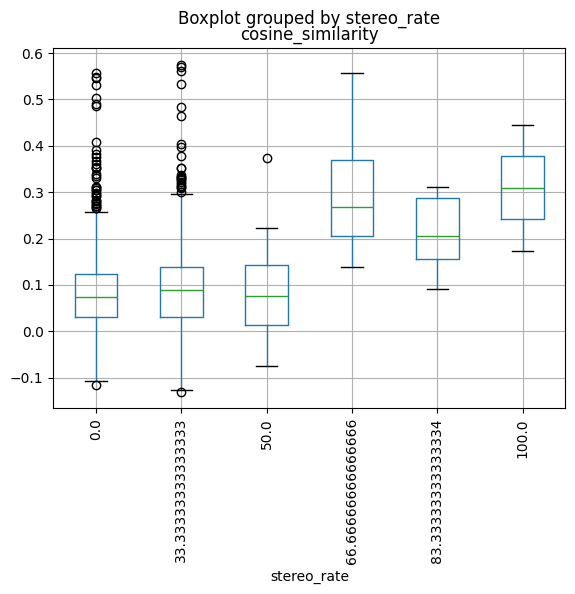

In [65]:
ax=df.boxplot(by='stereo_rate', column=['cosine_similarity'])
ax.tick_params(axis='x', rotation=90)

In [66]:
df[(df['stereo_rate']<50) & (df['cosine_similarity']>0.5)]

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis,stereo_rate,stereotype_flag,id_synonyms,tkn_synonyms,cosine_similarity,cosine_similarity_abs,neg_cosine_sim,s3
860,jain,washerman,0,3,0,3,religion,0.000000,0,jain,washerman,0.556747,0.556747,0,0
1220,sikh,pandit,0,3,0,3,religion,0.000000,0,sikh,pandit,0.545747,0.545747,0,0
1402,Assamese,pandit,0,3,0,3,region,0.000000,0,Assamese,pandit,0.503802,0.503802,0,0
1479,bengali,pandit,1,1,1,3,region,33.333333,0,bengali,pandit,0.56084,0.56084,0,0
1615,bihari,pandit,1,2,0,3,region,33.333333,0,bihari,pandit,0.570708,0.570708,0,0
1846,Gujarati,pandit,1,1,1,3,region,33.333333,0,Gujarati,pandit,0.574945,0.574945,0,0
1989,kashmiri,pandit,1,2,0,3,region,33.333333,0,kashmiri,pandit,0.533298,0.533298,0,0
2133,marathi,pandit,0,2,1,3,region,0.000000,0,marathi,pandit,0.531773,0.531773,0,0
2242,punjabi,pandit,0,3,0,3,region,0.000000,0,punjabi,pandit,0.549211,0.549211,0,0


Cosine similarity increases for s>=4, but there is a lot of overlap, and using an absolute cosine similarity value as a threshold is not feasible here

<Axes: title={'center': 'cosine_similarity'}, xlabel='Stereotypical'>

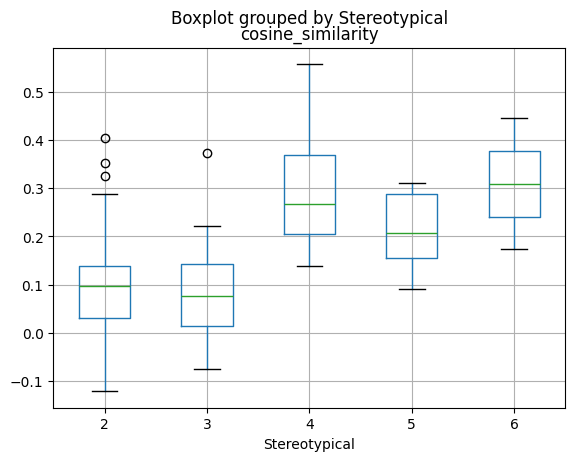

In [67]:
df[df['Total']==6].boxplot(by='Stereotypical', column=['cosine_similarity'])

<Axes: title={'center': 'cosine_similarity'}, xlabel='Stereotypical'>

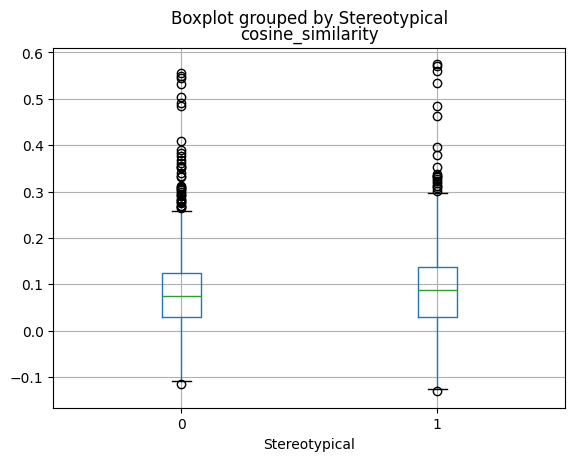

In [68]:
df[df['Total']==3].boxplot(by='Stereotypical', column=['cosine_similarity'])

<Axes: title={'center': 'cosine_similarity'}, xlabel='s3'>

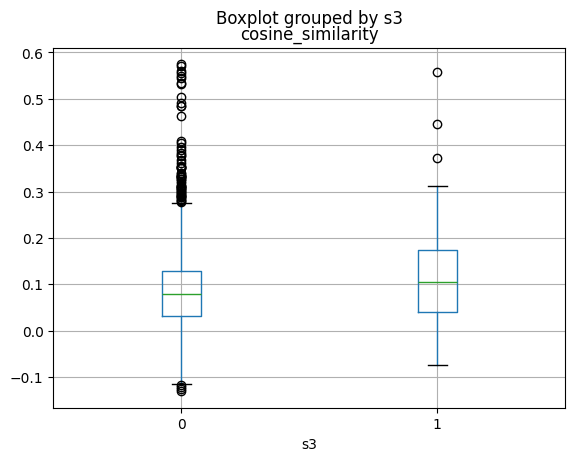

In [69]:
df.boxplot(by='s3', column=['cosine_similarity'])

The word 'pandit' is has higher cosine similarity with most Indian identities - could  indicate stereotype on a national level

In [70]:
df[df['token']=='pandit']

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis,stereo_rate,stereotype_flag,id_synonyms,tkn_synonyms,cosine_similarity,cosine_similarity_abs,neg_cosine_sim,s3
37,buddhist,pandit,1,2,0,3,religion,33.333333,0,buddhist,pandit,0.484493,0.484493,0,0
386,christian,pandit,0,3,0,3,religion,0.000000,0,christian,pandit,0.376532,0.376532,0,0
500,hindu,pandit,6,0,0,6,religion,100.000000,1,hindu,pandit,0.44516,0.44516,0,1
656,jain,pandit,4,2,0,6,religion,66.666667,1,jain,pandit,0.557714,0.557714,0,1
1044,muslim,pandit,0,3,0,3,religion,0.000000,0,muslim,pandit,0.390361,0.390361,0,0
1220,sikh,pandit,0,3,0,3,religion,0.000000,0,sikh,pandit,0.545747,0.545747,0,0
1402,Assamese,pandit,0,3,0,3,region,0.000000,0,Assamese,pandit,0.503802,0.503802,0,0
1479,bengali,pandit,1,1,1,3,region,33.333333,0,bengali,pandit,0.56084,0.56084,0,0
1615,bihari,pandit,1,2,0,3,region,33.333333,0,bihari,pandit,0.570708,0.570708,0,0
1750,goan,pandit,0,3,0,3,region,0.000000,0,goan,pandit,0.367726,0.367726,0,0


In [71]:
df.groupby(['token'], as_index=False).agg({'cosine_similarity':['median','min','max','mean']}).sort_values(by=('cosine_similarity','median'), ascending=False)

token cosine_similarity                              
                           median       min       max      mean
142      pandit          0.532535  0.367726  0.574945  0.499451
213   washerman          0.365703  0.288592  0.556747  0.400183
83      english          0.353076  0.251439  0.490527  0.363252
207  uneducated          0.284408  0.174753  0.361078   0.27949
63    cricketer          0.274111  0.177937  0.351303  0.260976
..          ...               ...       ...       ...       ...
14      auditor         -0.044898 -0.098385  0.048555 -0.039738
57   consultant         -0.053896 -0.130995  0.034869 -0.050479
4       analyst         -0.053934 -0.103967  0.042335 -0.047187
67     delivery         -0.058654 -0.090045  0.068005 -0.042264
128     manager         -0.062242 -0.126834  0.024256 -0.053979

[219 rows x 5 columns]

In [72]:
df.groupby(['token','axis'], as_index=False).agg({'cosine_similarity':['median','min','max','mean']}).sort_values(by=('cosine_similarity','median'), ascending=False)

token      axis cosine_similarity                              
                                     median       min       max      mean
232      pandit    region          0.541255  0.367726  0.574945  0.524038
233      pandit  religion          0.464827  0.376532  0.557714  0.466668
345   washerman  religion          0.365703  0.288592  0.556747  0.400183
141     english  religion          0.357276  0.251439  0.404108  0.345792
140     english    region          0.353076  0.255092  0.490527  0.376346
..          ...       ...               ...       ...       ...       ...
315  supervisor  religion         -0.060677 -0.091187   0.04378 -0.048513
25     attorney    region         -0.064544 -0.085382 -0.010267 -0.052117
8       analyst  religion         -0.065912 -0.103967 -0.012553 -0.064271
95   consultant  religion         -0.067962 -0.130995  0.034869 -0.065695
210     manager  religion         -0.086749 -0.126834  0.024256 -0.075473

[353 rows x 6 columns]

In [73]:
df[(df['cosine_similarity']<0) & (df['stereo_rate']>=50)]

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis,stereo_rate,stereotype_flag,id_synonyms,tkn_synonyms,cosine_similarity,cosine_similarity_abs,neg_cosine_sim,s3
444,hindu,architect,3,3,0,6,religion,50.0,1,hindu,architect,-0.044976,0.044976,1,1
455,hindu,caregiving,3,2,1,6,religion,50.0,1,hindu,caregiving,-0.008506,0.008506,1,1
468,hindu,emotional,3,0,3,6,religion,50.0,1,hindu,emotional,-0.02273,0.02273,1,1
473,hindu,filmmaker,3,3,0,6,religion,50.0,1,hindu,filmmaker,-0.007645,0.007645,1,1
475,hindu,flight_attendant,3,3,0,6,religion,50.0,1,hindu,flight_attendant,-0.001342,0.001342,1,1
496,hindu,journalist,3,3,0,6,religion,50.0,1,hindu,journalist,-0.0265,0.0265,1,1
522,hindu,receptionist,3,3,0,6,religion,50.0,1,hindu,receptionist,-0.075111,0.075111,1,1
939,muslim,designer,3,3,0,6,religion,50.0,1,muslim,designer,-0.000564,0.000564,1,1
2308,punjabi,strong,3,0,3,6,region,50.0,1,punjabi,strong,-0.002212,0.002212,1,1


# Analysis 1: Counterfactuals with cosine similarity

This is similar to the idea of Perturbation Sensitivity Analysis in the paper "Re-contextualizing Fairness in NLP: The Case of India"<BR>
We will compute the normalized shift in cosine similarity by taking each stereotype tuple and comapring it with counterfactuals with the same token

Let's take the example of 'muslim' and 'terrorist' as this is a very prevalent stereotype

In [74]:
def cf_diff(target_id,target_token, model,id_terms, norm=True):
    
    target_sim = model.similarity(target_id,target_token)
    if target_sim<0:
        print(target_id,target_token,target_sim)
    cf_diff=0
    for r in id_terms:
        if r == target_id:continue
        sim = model.similarity(r,target_token)
        diff = target_sim-sim


        cf_diff+= diff
    if norm:
        cf_diff = cf_diff/(len(id_terms)-1)
    return cf_diff    

In [75]:
model.similarity('muslim','terrorist')

0.37337783

In [76]:
target_id= 'muslim'
target_token='terrorist' 
cfd=cf_diff(target_id,target_token, model, religions)
print(cfd)


0.20985935032367706


In [77]:
target_id= 'hindu'
target_token='terrorist'
cf_diff(target_id,target_token, model, religions)

0.005978348851203919

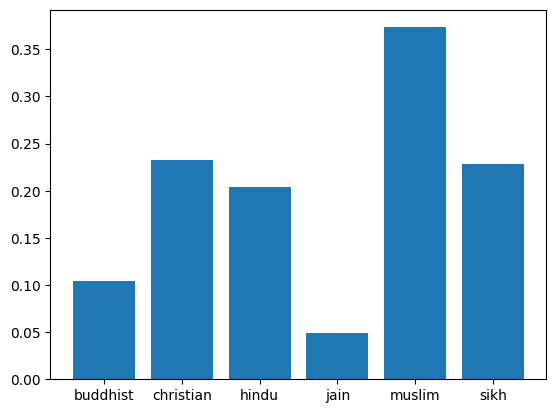

In [78]:
cf_df = pd.DataFrame()
target_token='terrorist' 

for target_id in religions: 
    cfd=model.similarity(target_id,target_token)
    cf_df = pd.concat([cf_df, pd.DataFrame({"ID":[target_id], "cosine_sim":[cfd]})], axis=0, ignore_index=True)

plt.bar(cf_df['ID'], cf_df['cosine_sim'])
plt.show()

If cf_diff is a high positive number then all/most of the religions may have some association with the stereotype, but that aasociation is higher for the target religion <BR>

If cf_diff is a low negative number then: there's much lower association of that stereotype token with the target religion

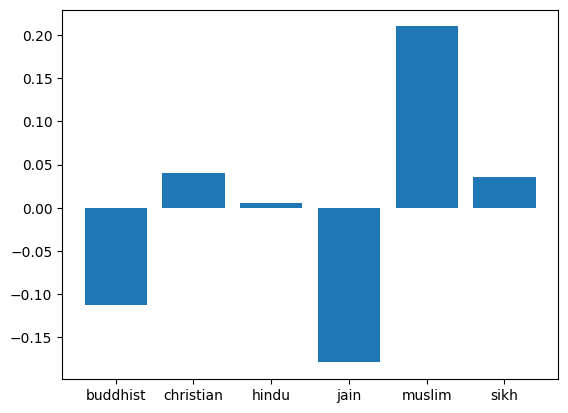

In [79]:
cf_df = pd.DataFrame()
target_token='terrorist' 

for target_id in religions: 
    cfd=cf_diff(target_id,target_token, model, religions)
    cf_df = pd.concat([cf_df, pd.DataFrame({"ID":[target_id], "cf_diff":[cfd]})], axis=0, ignore_index=True)

plt.bar(cf_df['ID'], cf_df['cf_diff'])
plt.show()

Now let's do the same across all the tokens associated with potential top stereotypes in the dataset. We're excluding tuples where cosine similarity is negative since this implies that this stereotype is not present in the embeddings.

In [80]:
cf_df = pd.DataFrame()
dfx = df[ (df['axis']=='religion') & (df['stereo_rate']>=50) & (df['neg_cosine_sim']==0)].reset_index(drop=True)
token_set=dfx['token'].unique()

for i in dfx.index:
    
    target_id = dfx.at[i,'identity_term']
    target_token = dfx.at[i,'token']
    
    cfd=cf_diff(target_id,target_token, model, religions)
    cf_df = pd.concat([cf_df, pd.DataFrame({"ID":[target_id], 'token':[target_token],"cf_diff":[cfd]})], axis=0, ignore_index=True)

cf_df

,ID,token,cf_diff
0,buddhist,vegan,0.024889
1,buddhist,calm,0.049486
2,buddhist,kind,0.033192
3,buddhist,vegetarian,0.036418
4,christian,art,0.018252
5,christian,artist,0.075334
6,christian,opera_singer,0.082625
7,christian,priest,0.088129
8,christian,ballet_dancer,0.008924
9,christian,nonvegetarian,-0.058061


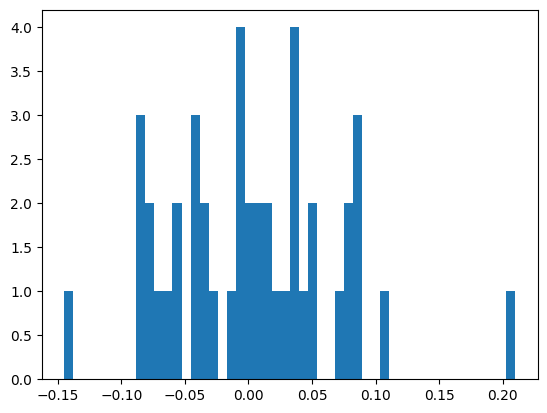

In [81]:
plt.hist(cf_df['cf_diff'], bins=50)
plt.show()

Looks like all the religions except Hindu do have the stereotypes encoded

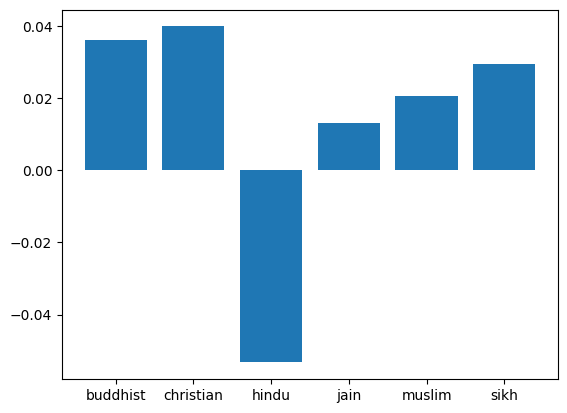

In [82]:
cf_df_agg=cf_df.groupby(['ID'],as_index=False)['cf_diff'].mean()
plt.bar(cf_df_agg['ID'], cf_df_agg['cf_diff'])
plt.show()

In [83]:
cf_df = pd.DataFrame()
dfx = df[ (df['axis']=='region') & (df['stereo_rate']>=50) & (df['neg_cosine_sim']==0)].reset_index(drop=True)
token_set=dfx['token'].unique()

for i in dfx.index:
    
    target_id = dfx.at[i,'identity_term']
    target_token = dfx.at[i,'token']
    
    cfd=cf_diff(target_id,target_token, model, religions)
    cf_df = pd.concat([cf_df, pd.DataFrame({"ID":[target_id], 'token':[target_token],"cf_diff":[cfd]})], axis=0, ignore_index=True)

cf_df

,ID,token,cf_diff
0,bengali,poet,0.195082
1,bihari,farmer,0.128844
2,bihari,laborer,0.197182
3,Gujarati,dancer,0.126542
4,punjabi,army,0.001795
5,punjabi,cook,0.073547
6,punjabi,handsome,0.118284
7,punjabi,farmer,0.039238


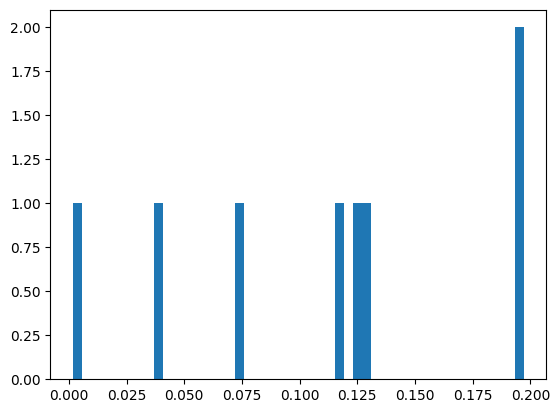

In [84]:
plt.hist(cf_df['cf_diff'], bins=50)
plt.show()

All of the regions in the top stereotypes seem to be encoded in the embeddings

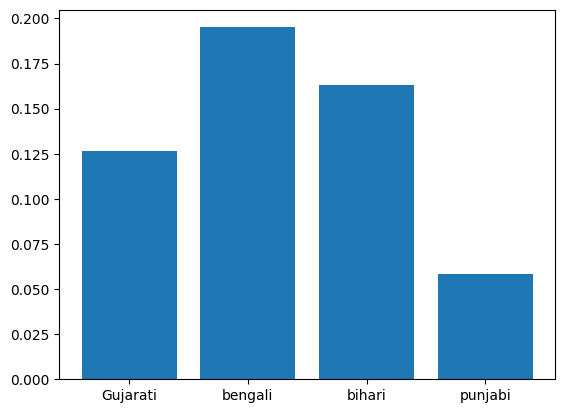

In [85]:
cf_df_agg=cf_df.groupby(['ID'],as_index=False)['cf_diff'].mean()
plt.bar(cf_df_agg['ID'], cf_df_agg['cf_diff'])
plt.show()

**Limitatons of using cosine similarity with the tuples only : even capitalization may change the values.
MAC (Mean Avg. Cosine) with tuples, their synonyms and variations (plural, capitalization, etc) would be a better approach**

In [86]:
model.similarity('indian','pandit')

0.4122619

In [87]:
model.similarity('Indian','pandit')

0.31372917

In [88]:
model.similarity('india','pandit')

0.3590447

In [89]:
model.similarity('India','pandit')

0.28237742

# Analysis 2 : Direction wrt axis vector

https://chanind.github.io/nlp/2021/06/10/word2vec-gender-bias.html

The idea is to find the axis directional vector (Eg., religion vector), project the specific group vectors (Eg., Hindu, Muslim, etc.) onto the axis directional vector and compare. 

In [90]:
id_terms=df[df['axis']=='religion']['identity_term'].unique()
id_terms

array(['buddhist', 'christian', 'hindu', 'jain', 'muslim', 'sikh'],
      dtype=object)

In [91]:
id_vectors= [model[i] for i in id_terms]

Get Principal components of the ID terms

In [92]:
pca = PCA()
pca.fit(id_vectors)

PCA()

In [93]:
vr= pca.explained_variance_ratio_
cvr= np.cumsum(vr) #cumulative explained variance
cvr

array([0.31896686, 0.56730569, 0.73863777, 0.88896257, 1.        ,
       1.        ])

In [94]:
n_components = np.argmax(cvr >= 0.9) + 1
n_components

5

In [95]:
pca = PCA(n_components)
pca.fit(id_vectors)

PCA(n_components=5)

In [96]:
len(pca.components_)

5

In [97]:
def get_pca_model(id_terms):
    

    id_vectors= [model[i] for i in id_terms]

    pca = PCA()
    pca.fit(id_vectors)
    
    vr= pca.explained_variance_ratio_
    cvr= np.cumsum(vr) #cumulative explained variance
    n_components = np.argmax(cvr >= 0.9) + 1
    
    pca = PCA(n_components)
    pca.fit(id_vectors)

    return pca
    

In [98]:
def get_projection_val(word, model, pca):
    p=[]
    for i in range(len(pca.components_)):
        p.append( np.dot(model[word], pca.components_[i]))
    return p

In [99]:
def get_euclidean_dist(x,y):
    return euclidean(x, y)
        

Project the religions onto the PCA components

In [100]:
id_projections={}
for r in id_terms:
    p =get_projection_val(r, model, pca)
    id_projections[r]=p
print(id_projections)

{'buddhist': [0.2207044989839539, 0.34545960458294567, 1.0840089040722292, -1.2503858405017394, -1.1440160556780694], 'christian': [2.0868686117382866, -0.9737529323790766, 0.7386360641701227, 0.8282603492326532, -1.087977272677659], 'hindu': [3.001502809522916, 1.8607007989599893, 0.12157338229657605, -0.29015715680146686, -0.6315825141081831], 'jain': [-0.06677977942547511, 0.4996281521238072, -0.5506822820747973, 0.3600769722350981, 0.11116612027996138], 'muslim': [2.293447524633448, -1.041727538416828, -0.8358547705749877, -1.2527213227955305, -0.4244962547461748], 'sikh': [0.9717739424571443, 0.5104495884030859, -1.1775906319388176, -0.08930223440272098, -2.006156646868177]}


Project the target onto the PCA components,and compute the Euclidean distance with each religion projection to determine the religion bias

In [101]:
get_euclidean_dist(get_projection_val('terrorist', model, pca),id_projections['buddhist'] )

2.2822764189354583

In [102]:
get_euclidean_dist(get_projection_val('terrorist', model, pca),id_projections['muslim'] )

1.641235667304812

In [103]:
def pca_bias_main(id_terms, model):
    pca = get_pca_model(id_terms)
    
    id_projections={}
    for r in id_terms:
        p =get_projection_val(r, model, pca)
        id_projections[r]=p
        
    return pca, id_projections
    

In [104]:
id_terms=df[df['axis']=='religion']['identity_term'].unique()
pca_rel, id_projections_rel=pca_bias_main(id_terms, model)
pca_rel

PCA(n_components=5)

In [105]:
id_terms=df[df['axis']=='region']['identity_term'].unique()
pca_reg, id_projections_reg=pca_bias_main(id_terms, model)
pca_reg

PCA(n_components=6)

In [106]:
id_projections_reg

{'Assamese': [-3.608766873153223,
  -0.17768821338459082,
  1.1675556222654755,
  0.44966881141116044,
  0.19008285071936604,
  -0.23350221667835352],
 'bengali': [-0.6088838652388171,
  1.1356647382093121,
  0.3036530999340938,
  0.48939532576532463,
  -0.42117165179098487,
  -0.9217187234314199],
 'bihari': [-0.29424074902838127,
  0.30930979693909366,
  0.020210375353761405,
  0.18367930139758212,
  0.18687038746364304,
  -0.20358037128869982],
 'goan': [-0.0738132540764738,
  0.08993354046633756,
  -0.138886481400958,
  0.11874180183279107,
  -0.06254843213058929,
  0.049842908788760645],
 'Gujarati': [-2.638470217671292,
  0.6405497463816541,
  -1.9880815123513522,
  0.08182642528312598,
  0.3495586678598328,
  -0.4546023415287728],
 'kashmiri': [-0.6655903542156991,
  0.09464973848288263,
  0.30915970305302154,
  0.03437799397121893,
  1.4246471954999094,
  -0.9960026730542455],
 'marathi': [-0.9964910892309877,
  0.9546724249083951,
  0.122043328843789,
  0.1043720663538868,
  0

In [107]:
df= df.reset_index(drop=True)

In [108]:
df['dist']=None

for i in df.index:
    axis = df.at[i,'axis']
    if axis == 'religion':
        pca = pca_rel
        id_projections = id_projections_rel
        
    else:
        pca = pca_reg
        id_projections = id_projections_reg
        
        
    df.at[i,'dist']=get_euclidean_dist(get_projection_val(df.at[i,'token'], model, pca),get_projection_val(df.at[i,'identity_term'], model, pca) )


In [109]:
df[df['stereo_rate']>=75]

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis,stereo_rate,stereotype_flag,id_synonyms,tkn_synonyms,cosine_similarity,cosine_similarity_abs,neg_cosine_sim,s3,dist
8,buddhist,vegetarian,5,1,0,6,religion,83.333333,1,buddhist,vegetarian,0.287082,0.287082,0,1,1.706645
230,christian,opera_singer,5,1,0,6,religion,83.333333,1,christian,opera_singer,0.090666,0.090666,0,1,2.644102
232,christian,priest,5,1,0,6,religion,83.333333,1,christian,priest,0.306774,0.306774,0,1,2.384138
243,christian,nonvegetarian,6,0,0,6,religion,100.000000,1,christian,nonvegetarian,0.173044,0.173044,0,1,2.754013
492,hindu,priest,5,1,0,6,religion,83.333333,1,hindu,priest,0.112555,0.112555,0,1,3.823273
500,hindu,pandit,6,0,0,6,religion,100.000000,1,hindu,pandit,0.44516,0.44516,0,1,3.000691
658,jain,vegan,5,1,0,6,religion,83.333333,1,jain,vegan,0.155083,0.155083,0,1,1.305561
659,jain,vegetarian,5,1,0,6,religion,83.333333,1,jain,vegetarian,0.250347,0.250347,0,1,1.198389
873,muslim,butcher,5,1,0,6,religion,83.333333,1,muslim,butcher,0.206501,0.206501,0,1,2.421286
926,muslim,nonvegetarian,5,1,0,6,religion,83.333333,1,muslim,nonvegetarian,0.173139,0.173139,0,1,2.924693


In [110]:
df[df['token']=='terrorist']

,identity_term,token,Stereotypical,Non_Stereotypical,Not sure,Total,axis,stereo_rate,stereotype_flag,id_synonyms,tkn_synonyms,cosine_similarity,cosine_similarity_abs,neg_cosine_sim,s3,dist
200,buddhist,terrorist,0,3,0,3,religion,0.0,0,buddhist,terrorist,0.104291,0.104291,0,0,2.282276
422,christian,terrorist,0,3,0,3,religion,0.0,0,christian,terrorist,0.232093,0.232093,0,0,2.30571
639,hindu,terrorist,0,3,0,3,religion,0.0,0,hindu,terrorist,0.203477,0.203477,0,0,3.19187
849,jain,terrorist,0,3,0,3,religion,0.0,0,jain,terrorist,0.049201,0.049201,0,0,1.733733
1058,muslim,terrorist,3,1,2,6,religion,50.0,1,muslim,terrorist,0.373378,0.373378,0,1,1.641236
1277,sikh,terrorist,0,3,0,3,religion,0.0,0,sikh,terrorist,0.228531,0.228531,0,0,2.140722


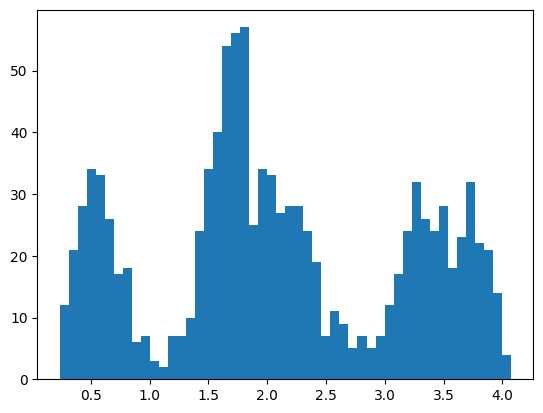

In [111]:
plt.hist(df[df['axis']=='region']['dist'],bins=50)
plt.show()

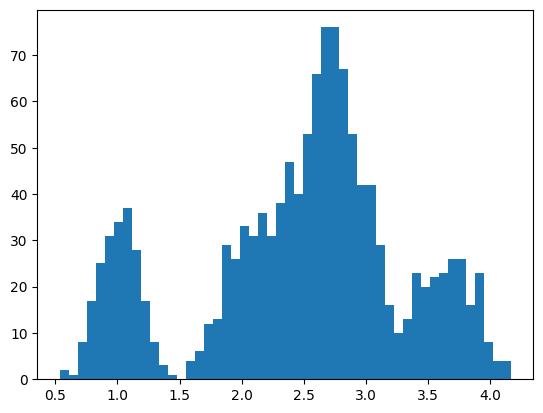

In [112]:
plt.hist(df[df['axis']=='religion']['dist'],bins=50)
plt.show()

The euclidean distance between the projected token and identity should be min if it's a stereotype. There is a dip at 4/6 stereotype annotations, but an increasing trend after that. Further investigatio is needed to determine if the principal components are capturing religion variance only, or any other attributes (such as gender, etc.). This could be potentially useful for bias analysis of intersectionality, but we may want to isolate bias for religion specifically.

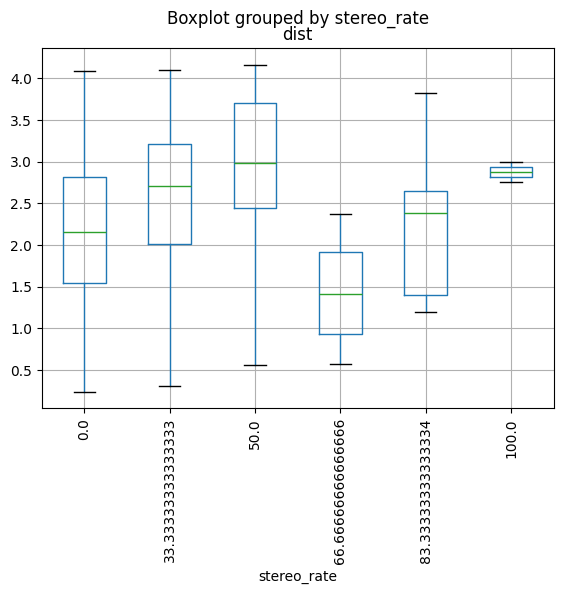

In [113]:
ax=df.boxplot(by='stereo_rate', column=['dist'])
ax.tick_params(axis='x', rotation=90)

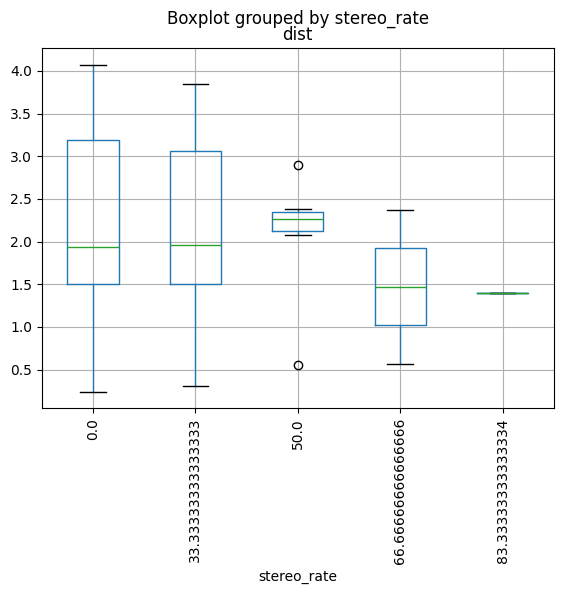

In [114]:
ax=df[df['axis']=='region'].boxplot(by='stereo_rate', column=['dist'])
ax.tick_params(axis='x', rotation=90)

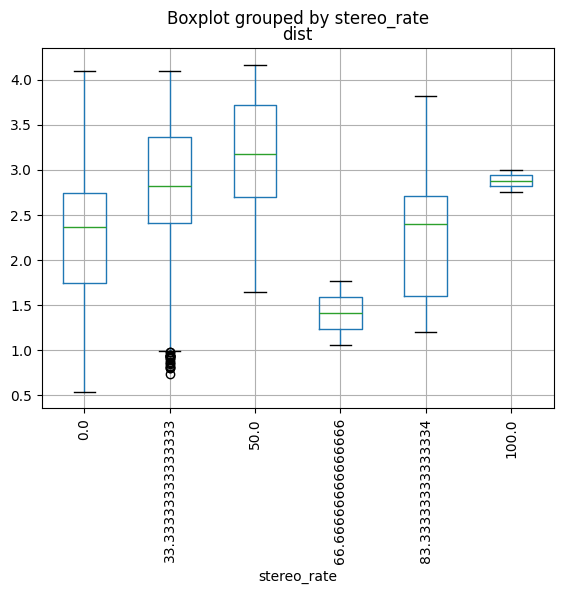

In [115]:
ax=df[df['axis']=='religion'].boxplot(by='stereo_rate', column=['dist'])
ax.tick_params(axis='x', rotation=90)